In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [81]:
out_dir = os.path.join(os.getcwd(), "../../out/regression/basics")

In [82]:
def plot_data(ax, data, x, y):
    sns.scatterplot(x=data[x], y=data[y], ax=ax, zorder=3, label='data')

def plot_model(ax, data, x, y, reg):
    plot_data(ax, data, x, y)
    x_min, x_max = ax.get_xlim()
    X = np.arange(x_min, x_max, 0.2).reshape(-1, 1)
    y_hat = reg.predict(X)
    sns.lineplot(x=X[:, 0], y=y_hat, color='orange', ax=ax, label='model')

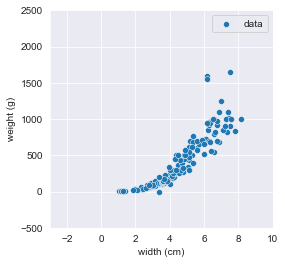

In [83]:
df = pd.read_csv('data/fish.csv')[['Width', 'Weight']].rename(columns={
    'Width': 'width (cm)',
    'Weight': 'weight (g)'
})

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.set_xlim([-3, 10])
ax.set_ylim([-500, 2500])
plot_data(ax, df, 'width (cm)', 'weight (g)')
plt.savefig(os.path.join(out_dir, "regression-example-data-only.png"), facecolor='white', bbox_inches='tight', transparent=False)
plt.show()

width (cm)       7.48
weight (g)    1650.00
Name: 144, dtype: float64


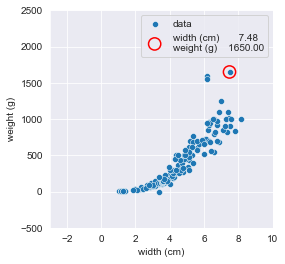

In [84]:
df = pd.read_csv('data/fish.csv')[['Width', 'Weight']].rename(columns={
    'Width': 'width (cm)',
    'Weight': 'weight (g)'
})

example = df.loc[df['weight (g)'].argmax(), ['width (cm)', 'weight (g)']]
print(example)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.set_xlim([-3, 10])
ax.set_ylim([-500, 2500])
plot_data(ax, df, 'width (cm)', 'weight (g)')
ax = sns.scatterplot(x=[example['width (cm)']], y=[example['weight (g)']], facecolor="none", linewidth=1.5, s=150, fc="none", label=example.to_string(), ax=ax, edgecolor='red', zorder=2)
plt.savefig(os.path.join(out_dir, "regression-example-data-only-highlight.png"), facecolor='white', bbox_inches='tight', transparent=False)
plt.show()

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


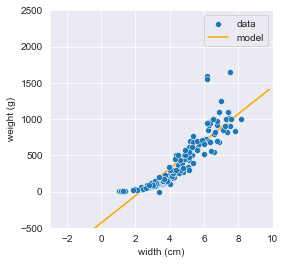

In [85]:
lr = LinearRegression().fit(df[['width (cm)']], df['weight (g)'])

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.set_xlim([-3, 10])
ax.set_ylim([-500, 2500])
plot_model(ax, df, 'width (cm)', 'weight (g)', lr)
plt.savefig(os.path.join(out_dir, "regression-example.png"), facecolor='white', bbox_inches='tight', transparent=False)
plt.show()